In [1]:
# 原始图像地址
import numpy as np
import cv2
from matplotlib import pyplot as plt
img_path="/home/wzc/zlt_self/ZNewMyModel/data/Drishti-GS/test/disc_small/image/gdrishtiGS_005.png"
# img_path="/home/wzc/zlt_self/pOSAL-master/data/Drishti-GS/test/disc_small/image/gdrishtiGS_003.png"
# img_path="/home/wzc/zlt_self/pOSAL-master/data/Drishti-GS/test/disc_small/image/gdrishtiGS_028.png"
mask_raw_path="/home/wzc/zlt_self/pOSAL-master/data/Drishti-GS/test/disc_small/mask/gdrishtiGS_005.png"
img = cv2.imread(img_path)
mask_raw=cv2.imread(mask_raw_path)
img_gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
b,g,r = cv2.split(img)

In [2]:
def show_plt(img_list=[img_gray,b,g,r]):
    """ 图像显示。传参：图像元组 返回值：无 """
    out_imgs=np.hstack(tuple(img_list))
    out_imgs = cv2.cvtColor(out_imgs,cv2.COLOR_RGBA2BGR)
    plt.imshow(out_imgs)

In [3]:
def show_tuple(method_,imgs_tuple=[img_gray,b,g,r],param=list()):
    """ 显示处理后的图像。传参：图像处理方法；
        返回值：图像元组。
    """
    img_tuple=list()
    if len(param)==0:
        for x_ in imgs_tuple:
            img_tuple.append(method_(x_))
        show_plt(tuple(img_tuple))
        return img_tuple
    else:
        for x_ in imgs_tuple:
            img_tuple.append(method_(x_,param))
        show_plt(tuple(img_tuple))
        return img_tuple

[[1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]
 ...
 [1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]]


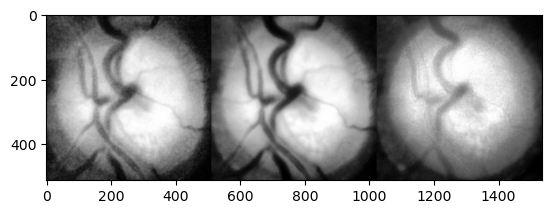

In [4]:
img_gray=cv2.equalizeHist(img_gray)
ones_ch=np.ones((512,512), dtype="uint8")*1
print(ones_ch)
def equalizeH(img):
    out_=cv2.equalizeHist(img)
    return out_
oq_=show_tuple(equalizeH,imgs_tuple=(b, g, r))

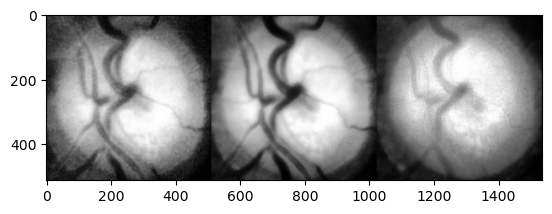

In [5]:
oq_1=show_tuple(equalizeH,oq_)

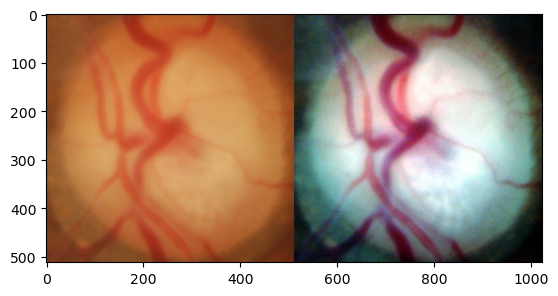

In [6]:
eq_img=cv2.merge(oq_)
show_plt((img,eq_img))

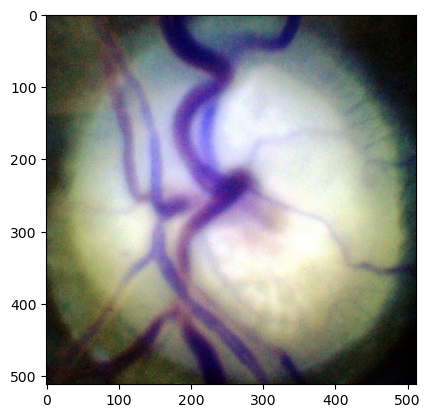

In [7]:
plt.imshow(eq_img)

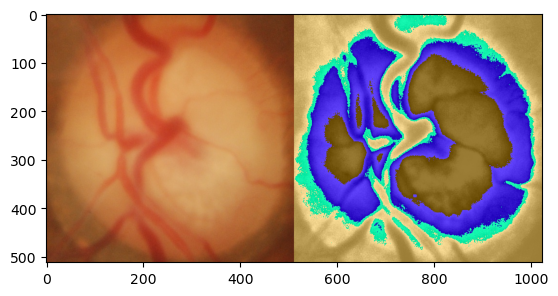

In [19]:
eq_img2=cv2.merge([oq_[1]+55,oq_[1]-130,oq_[1]-100])
show_plt((img,eq_img2))

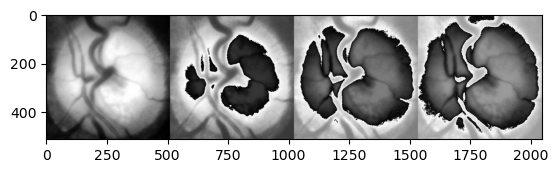

In [20]:
b2,g2,r2=cv2.split(eq_img2)
show_plt([img_gray,b2,g2,r2])

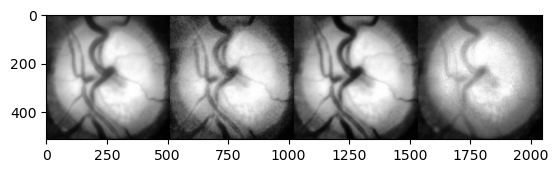

In [26]:
show_plt([img_gray,oq_[0],oq_[1],oq_[2]])

In [ ]:
trail_img=oq_[1]

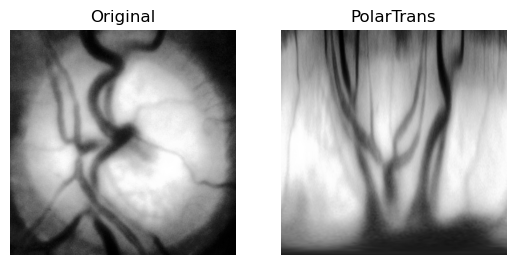

In [25]:
# 1.46 极坐标系中的圆形图像修正
# 读取彩色图像(BGR)
def polar_trans(img):
    h, w = img.shape[:2]  # 图片的高度和宽度
    cx, cy = int(w/2), int(h/2)  # 以图像中心点作为变换中心
    maxR = max(cx, cy)  # 最大变换半径

    imgPolar = cv2.linearPolar(img, (cx,cy), maxR, cv2.INTER_LINEAR)
    imgPR = cv2.rotate(imgPolar, cv2.ROTATE_90_COUNTERCLOCKWISE)

    # plt.figure(figsize=(10,6))
    plt.figure()
    plt.subplot(121), plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB)), plt.title("Original"), plt.axis('off')
    plt.subplot(122), plt.imshow(cv2.cvtColor(imgPR, cv2.COLOR_BGR2RGB)), plt.title("PolarTrans"), plt.axis('off')
    plt.show()
polar_trans(oq_[1])

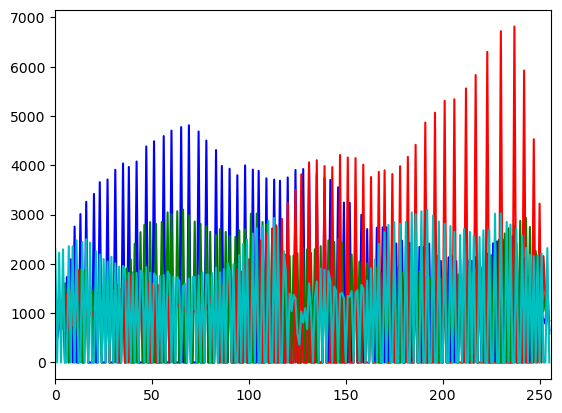

In [23]:
color = ('b','g','r','c')
for i,col in enumerate(color):
    histr = cv2.calcHist([oq_[0],oq_[1],oq_[2],g2],[i],None,[256],[0,256])
    plt.plot(histr,color = col)
    plt.xlim([0,256])
plt.show()